Below I imported Pandas, a library that specializes in manipulating data in CSV form, matplotlib, a library that provides graphing possibilities, and numpy, a general computational library.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

I then opened up the dataset using pandas and stored the columns so I could later assign the rows of the columns to the lists.

In [3]:
df = pd.read_csv('insurance_data.csv')
def csv_to_python_list(column):
    return df[str(column)]

I then assigned each column to its own list, where the order is maintained for later data evaluation.

In [4]:
list_of_columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
age = csv_to_python_list('age')
sex = csv_to_python_list('sex')
bmi = csv_to_python_list('bmi')
children = csv_to_python_list('children')
smoker = csv_to_python_list('smoker')
region = csv_to_python_list('region')
charges = csv_to_python_list('charges')

I then created a Patient_Data class with several methods in order to aid the data analyzation.  These methods included finding the amount of males and females in the dataset, finding the average BMI of the dataset, counting the amount of smokers and non smokers, a general function that seperates data into male and female categories, a function that creates a dictionary of the data with the keys being the columns from the original dataset, and the average insurance charge of the entire data set.

In [5]:
class Patient_Data:
    def __init__(self, age, sex, bmi, children, smoker, region, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.children = children
        self.smoker = smoker
        self.region = region
        self.charges = charges
    def analyze_Sex(self):
        self.malecount = 0
        self.femalecount = 0
        for entry in self.sex:
            if entry == 'male':
                self.malecount += 1
            else:
                self.femalecount += 1
        return self.malecount, self.femalecount
    def average_bmi(self):
        self.totalbmi = 0
        for entry in self.bmi:
            self.totalbmi += entry
        return self.totalbmi//self.bmi.count()
    def smoker_count(self):
        self.smokercount = 0
        self.nonsmokercount = 0
        for entry in self.smoker:
            if entry == 'yes':
                self.smokercount += 1
            else:
                self.nonsmokercount += 1
        return self.smokercount, self.nonsmokercount
    def seperate_data_by_sex(self, category):
        for entry in self.sex:
            tempmalelist = []
            tempfemalelist = []
            if entry == 'male':
                tempmalelist.append(self.category[self.sex.index(entry)])
            else:
                tempfemalelist.append(self.category[self.sex.index(entry)])
        return tempmalelist, tempfemalelist
    def generate_dictionary(self):
        self.patient_dictionary = {}
        self.patient_dictionary.update({'age':self.age, 'sex': self.sex, 'bmi': self.bmi, 'children': self.children, 'smoker': self.smoker, 'region': self.region, 'charges': self.charges})
    def average_charge(self):
        self.totalcharges = 0
        for entry in self.charges:
            self.totalcharges += entry
        return self.totalcharges//self.charges.count()


I then create an instance of the newly created class under patient_Stats, initializing it with the lists created earlier from the dataset.

In [6]:
patient_Stats = Patient_Data(age, sex, bmi, children, smoker, region, charges)

I then call the generate_dictionary() function to create a dictionary of the data.

In [7]:
patient_Stats_Dictionary = patient_Stats.generate_dictionary()

The amount of males and females are then found using a previous function.  The distribution of male versus female is representative of the general US population, with the distribution being close to 50/50.

In [8]:
mcount, fcount = patient_Stats.analyze_Sex()
print("There are {mcount} males and {fcount} females in this dataset.".format(mcount=mcount, fcount=fcount))

There are 676 males and 662 females in this dataset.


The average BMI is then found with a previous function.  The average BMI of the US is around 26, so this dataset has a BMI that is slightly higher than the expected BMI for a sample of US adults.  This could result in an overall inflated insurance cost for the entirety of the dataset, as BMI might be a contributing factor to higher costs.

In [9]:
avgbmi = patient_Stats.average_bmi()
print("The average BMI of this dataset is {avgbmi}.".format(avgbmi=avgbmi))

The average BMI of this dataset is 30.0.


The smoker and non smoker counts are shown below.  The percentage of smokers in this dataset (20%) is slightly higher than the percentage of the US that are smokers (12.5%).  This could result in inflated insurance costs as smoker status could contribute to a higher insurance cost.

In [10]:
smokercount, nonsmokercount = patient_Stats.smoker_count()
print("The amount of smokers in this dataset is {scount}.  The amount of non-smokers in this dataset is {nonscount}.".format(scount = smokercount, nonscount = nonsmokercount))

The amount of smokers in this dataset is 274.  The amount of non-smokers in this dataset is 1064.


The average cost for every individual is then calculated below.  This average cost (13270) is slightly higher than the average annual cost for an individual in the US (11945).  This could be either to random chance or could have been caused by the fact that the BMI and amount of smokers is higher in this dataset than in the general US population.

In [11]:
avgcost = patient_Stats.average_charge()
print("The average insurance cost of an individual in this dataset is {avcost}.".format(avcost = avgcost))

The average insurance cost of an individual in this dataset is 13270.0.


A scatterplot is then created to try and find a linkage between BMI and cost of insurance.  There seems to be a very low correlation between these two.

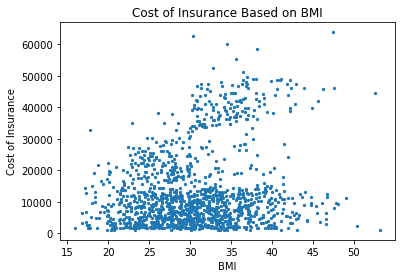

In [12]:
fig, ax = plt.subplots()

ax.scatter(patient_Stats.bmi, patient_Stats.charges, s=5)
ax.set_xlabel('BMI')
ax.set_ylabel('Cost of Insurance')
ax.set_title('Cost of Insurance Based on BMI')
plt.show()

A barplot is then created to attempt to establish a correlation between number of children and insurance cost.  It appears that as number of children increases, cost of insurance increases until number of children is greater than 3.  Then the average cost falls off greatly.  This seems to be contrary to what the expectation would be, as insurance plans increase if your child is included in the plan.  It would be important to evaluate the amount of individuals with 4 and 5 children.

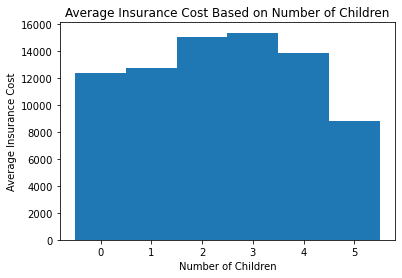

In [13]:
children_charge_dictionary = {}
i=0
while i in range(len(patient_Stats.children)):
    if patient_Stats.children[i] not in children_charge_dictionary:
        children_charge_dictionary[patient_Stats.children[i]] = [patient_Stats.charges[i]]
    else:
        children_charge_dictionary[patient_Stats.children[i]].append(patient_Stats.charges[i])
    i+=1
children_charge_averages = []
i=0
while i < len(children_charge_dictionary):
    children_charge_averages.append(np.mean(children_charge_dictionary[i]))
    i+=1
fig, ax = plt.subplots()
ax.bar([0,1,2,3,4,5],children_charge_averages , width=1)
ax.set_xlabel('Number of Children')
ax.set_ylabel('Average Insurance Cost')
ax.set_title('Average Insurance Cost Based on Number of Children')
plt.show()

The amount of individuals are then found for each amount of children shown in the dataset.  As expected, the amount of datapoints with 4 or 5 children is incredibly low when compared to the overall amount of datapoints within the set.  Therefore, it is hard to draw any conclusions regarding 4 or 5 children; however, with the amount of datapoints in the other 4 categories, a general trend of having more children resulting in a higher insurance cost is plausable.

In [14]:

print("There are {0} individuals with no children, {1} with 1, {2} with 2, {3}, with 3, {4} with 4, and {5} with 5.".format(len(children_charge_dictionary[0]), len(children_charge_dictionary[1]), len(children_charge_dictionary[2]), len(children_charge_dictionary[3]), len(children_charge_dictionary[4]), len(children_charge_dictionary[5])))

There are 574 individuals with no children, 324 with 1, 240 with 2, 157, with 3, 25 with 4, and 18 with 5.


The data is then organized by smoker status and plotted onto a bar graph.  As expected, the insurance cost of being a smoker on average is much higher than the insurance cost of non-smokers.

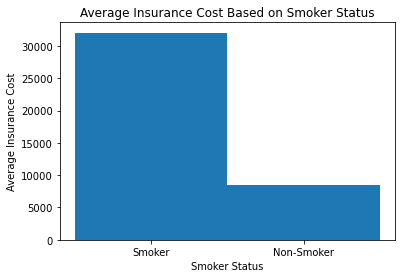

In [15]:
smoker_charge_dictionary = {}
i = 0
while i in range(len(patient_Stats.smoker)):
    if patient_Stats.smoker[i] not in smoker_charge_dictionary:
        smoker_charge_dictionary[patient_Stats.smoker[i]] = [patient_Stats.charges[i]]
    else:
        smoker_charge_dictionary[patient_Stats.smoker[i]].append(patient_Stats.charges[i])
    i+=1
smoker_average_charges = []
smoker_average_charges.append(np.mean(smoker_charge_dictionary['yes']))
smoker_average_charges.append(np.mean(smoker_charge_dictionary['no']))
fig, ax = plt.subplots()
ax.bar(['Smoker', 'Non-Smoker'],smoker_average_charges , width=1)
ax.set_ylabel('Average Insurance Cost')
ax.set_xlabel('Smoker Status')
ax.set_title('Average Insurance Cost Based on Smoker Status')
plt.show()

The number of smokers and non-smokers is reiterated below.  Although there are less smokers than non-smokers in this dataset, smokers are actually overrepresented in this dataset compared to the general US population.

In [16]:
num_of_smokers = list(patient_Stats.smoker_count())
print("There are {smoke} smokers and {non} non-smokers.".format(smoke = num_of_smokers[0],non = num_of_smokers[1]))

There are 274 smokers and 1064 non-smokers.


A bar graph of average insurance cost is then made based off the region an individual is from.  The averages seem to fall close to the overall average insurance cost of the dataset, so there does not seem to be a strong indication that the region an individual is from is a predictor for their insurance cost.

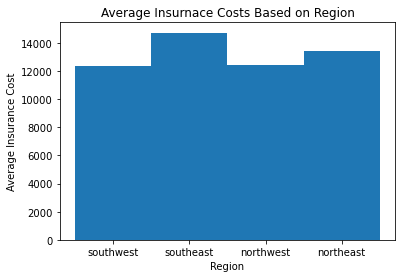

In [17]:
location_charge_dictionary = {}
i = 0
while i in range(len(patient_Stats.region)):
    if patient_Stats.region[i] not in location_charge_dictionary:
        location_charge_dictionary[patient_Stats.region[i]] = [patient_Stats.charges[i]]
    else:
        location_charge_dictionary[patient_Stats.region[i]].append(patient_Stats.charges[i])
    i+=1
location_average_charges = []
i=0
list_of_regions = list(location_charge_dictionary.keys())
while i < len(location_charge_dictionary):
    location_average_charges.append(np.mean(location_charge_dictionary[list_of_regions[i]]))
    i+=1
fig, ax = plt.subplots()
ax.bar(location_charge_dictionary.keys(), location_average_charges, width=1)
ax.set_xlabel('Region')
ax.set_ylabel('Average Insurance Cost')
ax.set_title('Average Insurnace Costs Based on Region')
plt.show()

The amount of individuals in each region is then shown below.  The amount of individuals in each region are very close.

In [18]:
print("There are {SW} individuals in the Southwest, {SE} in the Southeast, {NW} in the Northwest, and {NE} in the Northeast.".format(SW = len(location_charge_dictionary['southwest']), SE = len(location_charge_dictionary['southeast']), NW = len(location_charge_dictionary['northwest']), NE = len(location_charge_dictionary['northeast'])))

There are 325 individuals in the Southwest, 364 in the Southeast, 325 in the Northwest, and 324 in the Northeast.


A bar graph comparing average insurance cost based off the sex of the individual is then made below.  Males in general have a higher insurance cost when compared to female counterparts.  This does not account for the possibility that men could be more likely to smoke.

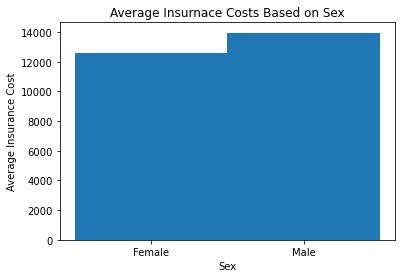

In [19]:
sex_charge_dictionary = {}
i = 0
while i in range(len(patient_Stats.sex)):
    if patient_Stats.sex[i] not in sex_charge_dictionary:
        sex_charge_dictionary[patient_Stats.sex[i]] = [patient_Stats.charges[i]]
    else:
        sex_charge_dictionary[patient_Stats.sex[i]].append(patient_Stats.charges[i])
    i+=1
sex_average_charges = []
sex_average_charges.append(np.mean(sex_charge_dictionary['female']))
sex_average_charges.append(np.mean(sex_charge_dictionary['male']))
fig, ax = plt.subplots()
ax.bar(['Female', 'Male'], sex_average_charges, width=1)
ax.set_xlabel('Sex')
ax.set_ylabel('Average Insurance Cost')
ax.set_title('Average Insurnace Costs Based on Sex')
plt.show()

Overall, the analyzing of this data didn't yield many surprises.  A few future directions this dataset could be taken is evaluating Male versus Female costs when accounting for factors like BMI and smoker status, analyzing the correlation between datapoints not in relation to insurance cost (BMI vs smoker status, sex vs smoker status, etc.), and running statistical analyses and obtaining numerical representation for correlations.